In [20]:
import csv
import pandas as pd
import numpy as np
import math

# Read training data and testing data

In [21]:
# read train.csv
train = pd.read_csv("train.csv", keep_default_na=False)
train_title = []
train_title_abstract = []
train_category = []
for i in range(0,81222):
    train_title.append(train['Title'][i])
    train_category.append(train['Category'][i])
    text = train['Title'][i] + train['Abstract'][i]
    train_title_abstract.append(text)
#print(train.shape)
#print(train.dtypes)
#print(train.info)

In [22]:
# read test.csv
test = pd.read_csv('test.csv', keep_default_na=False)
test_title = []
test_title_abstract = []
test_category = []
for i in range(0,20305):
    test_title.append(test['Title'][i])
    test_category.append(test['Category'][i])
    text = test['Title'][i] + test['Abstract'][i]
    test_title_abstract.append(text)

In [23]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import multilabel_confusion_matrix, confusion_matrix
import matplotlib.pyplot as plt
import product
import seaborn as sns

# Use text(Title) to do Bag of words

In [24]:
count_vectorizer = CountVectorizer() 
text_train_Cvectors = count_vectorizer.fit_transform(train_title) 

In [25]:
# tfidf = Term Frequency–Inverse Document Frequency
# each word importance will improve by their appearing count, however they will reduce the word frequency in the corpus
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(text_train_Cvectors)
X_train_tfidf.shape

(81222, 37383)

In [26]:
clf = MultinomialNB().fit(X_train_tfidf, train_category)

In [27]:
text_clf = Pipeline([
    ('vect', CountVectorizer()), # it only consider the frequency of each word
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB()),
])
text_clf.fit(train_title, train_category)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])

In [28]:
predicted = text_clf.predict(test_title)
print(metrics.classification_report(test_category, predicted,target_names=None))

               precision    recall  f1-score   support

        autos       1.00      0.09      0.17       491
entertainment       0.00      0.00      0.00       119
      finance       0.87      0.04      0.08      1093
 foodanddrink       0.87      0.26      0.40       748
       health       1.00      0.03      0.05       448
         kids       0.00      0.00      0.00        16
    lifestyle       0.62      0.05      0.09       665
       movies       0.00      0.00      0.00       129
        music       1.00      0.00      0.01       289
         news       0.50      0.95      0.66      6319
 northamerica       0.00      0.00      0.00         1
       sports       0.82      0.94      0.88      6715
       travel       0.60      0.01      0.02      1036
           tv       1.00      0.00      0.01       232
        video       1.00      0.00      0.01      1086
      weather       0.89      0.20      0.32       918

     accuracy                           0.63     20305
    macr

C:\Users\Ting\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Use text(Title,Abstract) to do Bag of words

In [29]:
TA_count_vectorizer = CountVectorizer() 
TA_text_train_Cvectors = TA_count_vectorizer.fit_transform(train_title_abstract) 
TA_tfidf_transformer = TfidfTransformer()
TA_X_train_tfidf = TA_tfidf_transformer.fit_transform(TA_text_train_Cvectors)

clf = MultinomialNB().fit(TA_X_train_tfidf, train_category)
TA_text_clf = Pipeline([
    ('vect', CountVectorizer()), # it only consider the frequency of each word
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB()),
])

TA_text_clf.fit(train_title_abstract, train_category)
predicted = TA_text_clf.predict(test_title_abstract)
print(metrics.classification_report(test_category, predicted,target_names=None))

               precision    recall  f1-score   support

        autos       1.00      0.02      0.04       491
entertainment       0.00      0.00      0.00       119
      finance       1.00      0.00      0.01      1093
 foodanddrink       0.99      0.12      0.21       748
       health       0.00      0.00      0.00       448
         kids       0.00      0.00      0.00        16
    lifestyle       0.88      0.01      0.02       665
       movies       0.00      0.00      0.00       129
        music       0.00      0.00      0.00       289
         news       0.48      0.98      0.65      6319
 northamerica       0.00      0.00      0.00         1
       sports       0.86      0.95      0.90      6715
       travel       0.00      0.00      0.00      1036
           tv       0.00      0.00      0.00       232
        video       0.00      0.00      0.00      1086
      weather       0.95      0.04      0.09       918

     accuracy                           0.62     20305
    macr

C:\Users\Ting\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Confusion Matrix

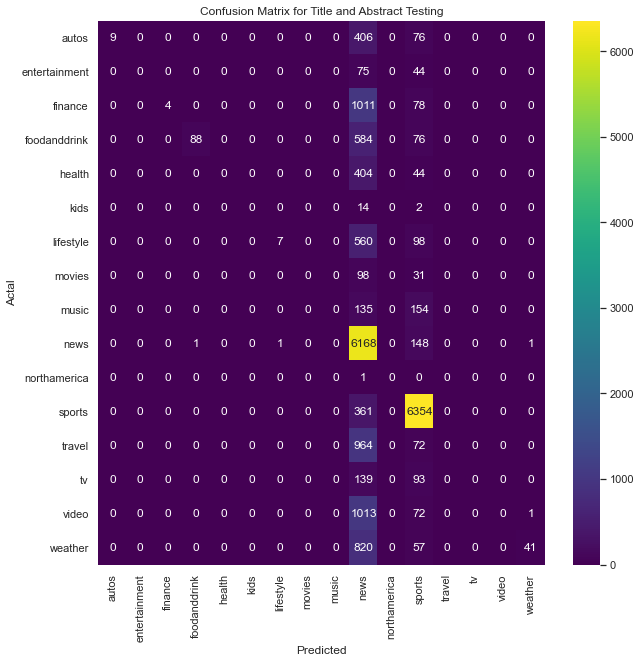

In [31]:
c_m = confusion_matrix(test_category, predicted, labels = label)

#Plot the confusion matrix
plt.figure(figsize=(10,10))
sns.heatmap(pd.DataFrame(c_m, label, label), annot=True, fmt='d', cmap='viridis')
plt.title('Confusion Matrix for Title and Abstract Testing')
plt.ylabel('Actal')
plt.xlabel('Predicted')
plt.show()